# Project: No-Show Appointments Dataset Investigaton

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**AppointmentID   :** The Unique ID that are given by the system.<br>
<br>
**Gender          :** Indicates Gender. Male (M) or Female(F)<br>
<br>
**ScheduledDay    :** What day the patient set up their appointment.<br>
<br>
**AppointmentDay  :** Indicates the date of the appointment<br>
<br>
**Age             :** Indicates the age of patient<br>
<br>
**Neighborhood    :** Indicates the location of the hospital.<br>
<br>
**Scholarship     :** Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>
    True (1) of False (0).<br>
<br>
**Hipertension    :** Indicates whether the patient has hipertension or not. True (1) of False (0).<br>
<br>
**Diabetes        :** Indicates whether the patient has diabetes or not. True (1) of False (0).<br>
<br>
**Alcoholism      :** Indicates whether the patient has alcholizm or not. True (1) of False (0).<br>
<br>
**Handcap         :** The handcap refers to the number of disabilites a person has.<br>
<br>
**SMS_received    :** 1 or more messages sent to the patient.<br>
<br>
**No-show         :** Indicates whether the patient showed up to their appointment or not. <br>
    ‘No’ if the patient showed up to their appointment,<br>
    ‘Yes’ if they did not show up.<br>
<br>



### Question(s) for Analysis

<br>

**Research Question 1** : Have the female patients who their age is above average age and receive SMS message more proportion to don't show up for their appointments than the male? <br>

**Research Question 2** : Are the patients with hipertension or diabets or at least one disability less proportion to don't show up for their appointments than the others?<br>

**Research Question 3** :Is there a relation between age groups and diseases (hipertension, diabets and alcholizm)? Which age group does not show up for their appointments most?<br>


**Research Question 4** :Is there an effect of which day scheduled the appointment or which day was the appointment to whether showing up their appointments or not?<br>


**Research Question 5** :Did people who makes more appointment than the others make habit that don't show up for their appointments? What can we say for these people about gender and membership of walfare program (scholarship)?<br>


In [1]:
import pandas as pd
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [3]:
# Data importing and check the first 5 rows

df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Checking the number of rows and columns

df.shape

(110527, 14)

> **Explanation**:  Our data set has 110527 rows and 14 columns.

In [5]:
# Checking the general data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Explanation**:  When I check the data, it seems there is no Non-value in our data. ScheduledDay and AppointmentDay are object. So, we need to chage the dtypes from object to datetime. I also plan to data type of PatientId from float to int.

In [6]:
# Checking the statistical data

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Explanation**:  As we can see our data, Patient ID and Appointment Id are unique values. I can drop AppointmentID easily. But I plan to use Patient ID in order to check whether how many times the same person didn't show up the appointment.  When I check the Age column, I see that mean and median almost the same (~37). But I see that a negative age. Most probably, this is a defected data. I may get rid of this data in future steps. Scholarship, Hipertension, Diabets Alcholism and SMS_received columns indicates 0 or 1. When I check the Handcap column, I see a person has maximum 4 disabilities.

In [7]:
#Checking Duplicated Data

df.duplicated().sum()

0

> **Explanation**:  There is no duplicated rows in our data set.

In [8]:
# Checking number of unique values in each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> **Explanation**:  As we can see in the result, the same patients normally make more than one appointment. 
I see also 5 different Handscap value and 81 different Neighbourhood.

In [9]:
#Checking different unique values in Neighbourhood columns

df.Neighbourhood.value_counts()[:5]

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighbourhood, dtype: int64

> **Explanation**:  As we can see in the result, JARDIM CAMBURI is the most populer place.

In [10]:
#Checking different unique values in Handcap columns

df.Handcap.value_counts()                

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> **Explanation**:  I see that how many people have how many disabilities.

In [11]:
#Checking the number of male and female in gender columns

df.Gender.value_counts() 

F    71840
M    38687
Name: Gender, dtype: int64

> **Explanation**:  The number of female patients is more than twice the number of male patients


In [12]:
#Checking the number of show up and no show up in no_show columns

df['No-show'].value_counts(normalize=True) 

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

> **Explanation**:  Almost %20 persantage of people do not show up their appointments



### Data Cleaning


In [13]:
# dropping the useles columns

df.drop(['AppointmentID'], axis =1, inplace=True)

> **Explanation**:  AppointmentID is an unique value, so I droped it easily. Patient ID is also a unique value for each patient. But I didn't drop it. It is wise to keep this data for next steps.

In [14]:
# Checking data after drop process

df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> **Explanation**:  AppointmentID was droped.

In [15]:
# Checking the negative age

df[df.Age<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
# Dropping the negative age row

ind=df[df.Age<0].index
df.drop(ind, inplace=True)

In [17]:
# Checking the negative age to be sure was droped

df[df.Age<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> **Explanation**:  The row which includes negative age was droped.

In [18]:
# Fix the data type of ScheduledDay and AppointmentDay

df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)

> **Explanation**: I changed the data type of ScheduledDay and AppointmentDay from object to datetime

In [19]:
# Fix the data type of PatientId

df.PatientId=df.PatientId.astype(int)         


> **Explanation**: I changed the data type of PatientId from float to int

In [20]:
#Checking the result

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.8+ MB


> **Explanation**: The data type of ScheduledDay, AppointmentDay and PatientId was changed

In [21]:
# making lower case the columns

df.rename(columns=lambda x:x.lower().replace('-','_'), inplace=True)

> **Explanation**: I changed the column names as uniform and more understandible


In [22]:
# Checking the Results

df.head(2)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> **Explanation**: The column names was changed.

In [23]:
# Change the values of no_show columns from Yes-No to 1-0

df.no_show=df.no_show.apply(lambda x:x.replace('Yes','1'))
df.no_show=df.no_show.apply(lambda x:x.replace('No','0'))
df.no_show=df.no_show.astype(int)

In [24]:
df.describe()['no_show']

count    110526.000000
mean          0.201934
std           0.401445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: no_show, dtype: float64

> **Explanation**: The values of no_show columns was changed from Yes-No to 1-0

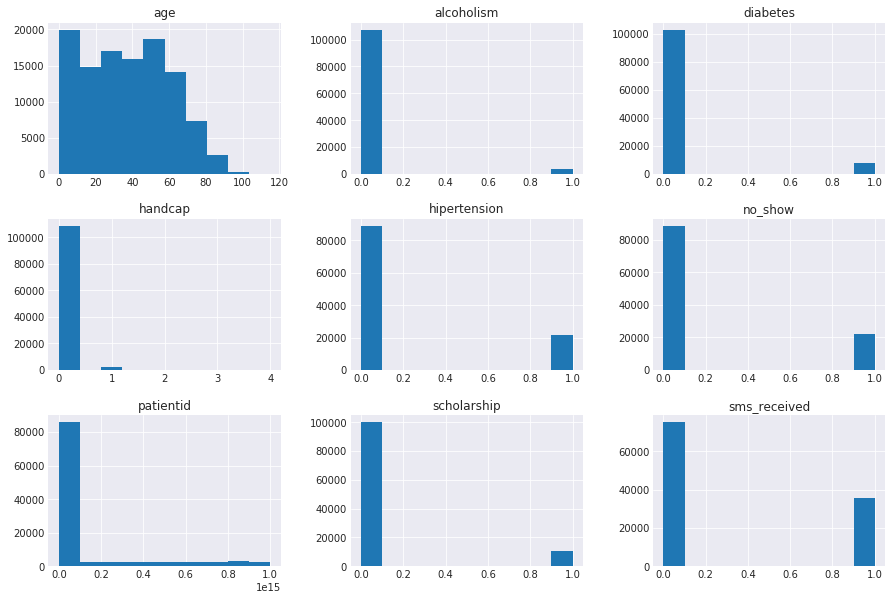

In [25]:
# Cheking Histograms of Numerical Features

df.hist(figsize=(15,10));

> **Explanation**: I checked the histopram graphs of our features. Our Age is right skewd an the other numerical features are generaly 1-0 datas. 


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1) Have the female patients who their age is above average age and receive SMS message more proportion to don't show up for their appointments than the male?


In [26]:
# Making a mask to use dependent variable easily

showup=df.no_show==0
noshowup=df.no_show==1

In [27]:
# Checking the mean of age who showup or not showup people

df.age[noshowup].mean() , df.age[showup].mean()

(34.317666562121957, 37.790504154999034)

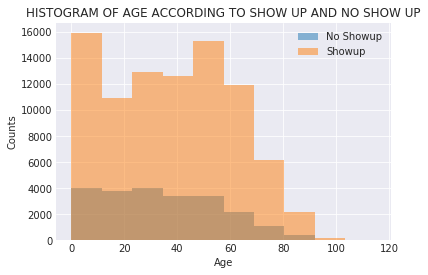

In [28]:
# Drawing the graph 

df.age[noshowup].hist(alpha=.5,label='No Showup')
df.age[showup].hist(alpha=.5,label='Showup')
plt.title('HISTOGRAM OF AGE ACCORDING TO SHOW UP AND NO SHOW UP')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend();

> **Explanation**: The average age of those who don't come to the appointment is slightly lower than those who come to the appointment

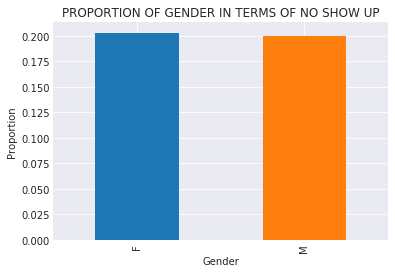

In [29]:
# Checking the gender effect whether show up for the appointment

df.groupby('gender')['no_show'].mean().plot(kind='bar')
plt.title('PROPORTION OF GENDER IN TERMS OF NO SHOW UP')
plt.xlabel('Gender')
plt.ylabel('Proportion');

> **Explanation**: It seems that there is no direct effect of gender whether show up for the appointment

In [30]:
# Checking the average age of male and female who don't show up for their appointment

df[noshowup].groupby('gender')['age'].mean()

gender
F    36.16219
M    30.83301
Name: age, dtype: float64

In [31]:
# Checking the average age of male and female who show up for their appointment

df[showup].groupby('gender')['age'].mean()

gender
F    39.591126
M    34.461372
Name: age, dtype: float64

In [32]:
# Making repetitive function for plot

def func_plot(df, grpby_feature, feature, knd, alph, lbl, colr, ttle, x, y, fig_size=(6,4)):
    
    df.groupby(grpby_feature)[feature].mean().plot(kind=knd,alpha=alph,label=lbl,color=colr, figsize=fig_size)
    plt.title(ttle)
    plt.xlabel(x)
    plt.ylabel(y)

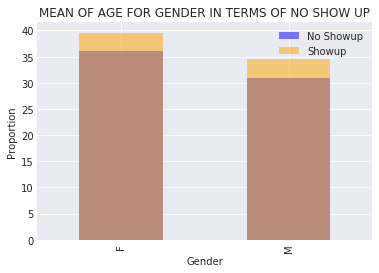

In [33]:
# See on the same graph the average age of male and female who show up for their appointment

ttle= 'MEAN OF AGE FOR GENDER IN TERMS OF NO SHOW UP'
func_plot(df[noshowup],'gender', 'age', 'bar', 0.5, 'No Showup', 'blue', ttle, 'Gender', 'Proportion' )
func_plot(df[showup],'gender', 'age', 'bar', 0.5, 'Showup', 'orange', ttle, 'Gender', 'Proportion' )
plt.legend();

> **Explanation**: The average age of women who make an appointment in Hospital is higher than men. Additionally, The average age of women who go to appointments and women who don't go to appointments is higher than men.

In [34]:
# Checking the possibility of no show up both for female and male who has sms message and are more than averane age

df[(df.age>=df.age.mean())&(df.sms_received==1)].groupby('gender')['no_show'].mean()

gender
F    0.231194
M    0.227622
Name: no_show, dtype: float64

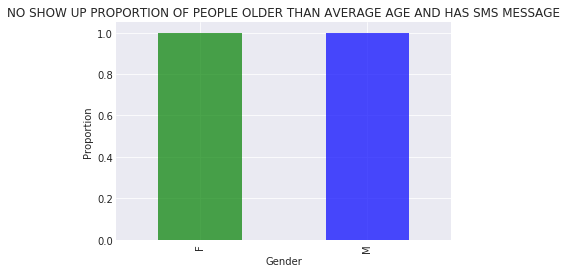

In [35]:
# Drawing the graph by using previous function (func_plot)

df_agesms=df[(df.age>=df.age.mean())&(df.sms_received==1)]
ttle='NO SHOW UP PROPORTION OF PEOPLE OLDER THAN AVERAGE AGE AND HAS SMS MESSAGE'
colr=['green','blue']

func_plot(df[noshowup],'gender', 'no_show', 'bar', 0.7 , None, colr, ttle, 'Gender', 'Proportion' );

> **Explanation**: The women who are older than average age and got the sms message about appointment have more possibility to no show up for their appointment than men

### Question 2) Are the patients with hipertension or diabets or at least one disability less proportion to don't show up for their appointment than the others?

In [36]:
# Checking the mean of hipertension who showup or not showup people
df.hipertension[noshowup].mean() , df.hipertension[showup].mean()

(0.16900398763385457, 0.20439420907637715)

In [37]:
# Checking the mean of diabetes who showup or not showup people
df.diabetes[noshowup].mean() , df.diabetes[showup].mean()

(0.064070970921636272, 0.073837677281848382)

In [38]:
# Checking the mean of handcap who showup or not showup people
df.handcap[noshowup].mean() , df.handcap[showup].mean()

(0.020296608270979882, 0.022741959254934416)

> **Explanation**: When I look at hipertension, diabetes and handcap features seperately, in each option, I recognized that no show up appointment proportion is directly proportional possibility of having these disease.

In [39]:
# Finding the people who has at least one of the disease and finding mean of them in terms of no show up

df[(df.hipertension==1)|(df.diabetes==1)|(df.handcap>=1)]['no_show'].mean()

0.17558187015108206

In [40]:
# Finding the people who has not any disease and finding mean of them in terms of no show up

df[~((df.hipertension==1)|(df.diabetes==1)|(df.handcap>=1))]['no_show'].mean()

0.20943558510391

In [41]:
# Assign these values to variables in order to draw the graph

mean_of_disease=df[(df.hipertension==1)|(df.diabetes==1)|(df.handcap>=1)]['no_show'].mean()
mean_of_notdisease=df[~((df.hipertension==1)|(df.diabetes==1)|(df.handcap>=1))]['no_show'].mean()

In [42]:
# Making repetitive function for plot

def func_plot_2(locations, heights, labels, ttle, x,y ):
    plt.bar(locations,heights,tick_label=labels)
    plt.title(ttle)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

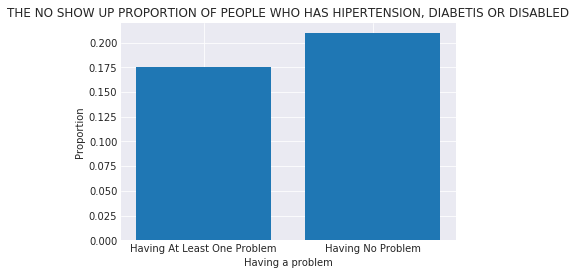

In [43]:
loc=[1,2]
hghts=[mean_of_disease,mean_of_notdisease]
lbls=['Having At Least One Problem','Having No Problem']
ttle='THE NO SHOW UP PROPORTION OF PEOPLE WHO HAS HIPERTENSION, DIABETIS OR DISABLED'
func_plot_2(loc, hghts, lbls, ttle, 'Having a problem', 'Proportion');

> **Explanation**: When I examine the graph, I see that patients with at least one disease (hipertension, diabets and disability) are less proportion to no show up for their appointments 

### Question 3) Is there a relation between age groups and diseases (hipertension, diabets and alcholizm)? Which age group does not show up for their appointments most?

In [44]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [45]:
# Making age groups in dataset
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [46]:
# I will use the age group in below

# Child     : lower than %25
# Young     : Between %25-%50
# Maturity  : Between %50-%75
# Old:      : More than  %75

bin_edges=[df.age.describe()[3],df.age.describe()[4],df.age.describe()[5],df.age.describe()[6],df.age.describe()[7]]
bin_names=['Child', 'Young', 'Mature', 'Old']

df['age_groups']=pd.cut(df.age,bin_edges,labels=bin_names)
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_groups
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Old


> **Explanation**: I produced 'age_groups' column by using age column. And this column has 4 different group. Child, Young, Maturity and Old.

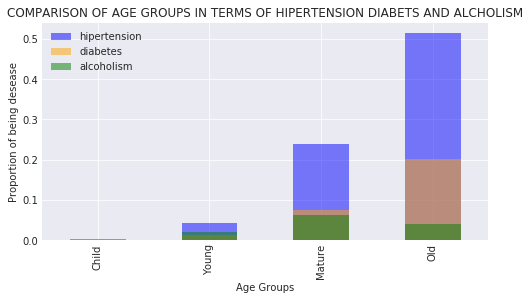

In [47]:
# Checking Comparison of Age Groups in terms of Hipertension, Diabetis and Alcholism

ttle='COMPARISON OF AGE GROUPS IN TERMS OF HIPERTENSION DIABETS AND ALCHOLISM'
x='Age Groups'
y='Proportion of being desease'
func_plot(df,'age_groups', 'hipertension', 'bar', 0.5, 'hipertension', 'blue', ttle, x, y , (8,4))
func_plot(df,'age_groups', 'diabetes', 'bar', 0.5, 'diabetes', 'orange', ttle, x, y, (8,4))
func_plot(df,'age_groups', 'alcoholism', 'bar', 0.5, 'alcoholism', 'green', ttle, x, y, (8,4))
plt.legend();

> **Explanation**: When we examine the graph, proportion of hipertension and diabets are increase with age. But the patients who use more alchol are between 37 and 55 years old.

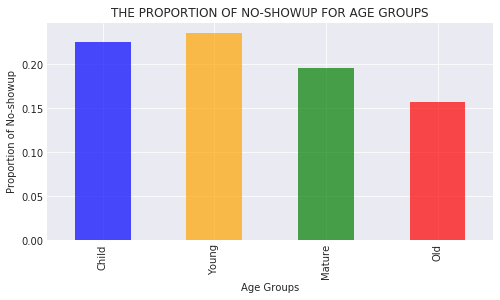

In [48]:
# Checking the effect of age groups to no showup

colr=['blue', 'orange', 'green', 'red']
ttle= 'THE PROPORTION OF NO-SHOWUP FOR AGE GROUPS'
func_plot(df,'age_groups', 'no_show', 'bar', 0.7, 'Age Groups', colr, ttle, 'Age Groups', 'Proportion of No-showup' , (8,4))

> **Explanation**: When we examine the graph, the possibilitty of do not showup their appointment for young people who are between 18-37 years old are the most. And then Child, Mature and Old people are respectively.

### Question 4) Is there an effect of which day scheduled the appointment or which day was the appointment to whether showing up their appointments or not? 

In [49]:
# Producing new columns to understand which day the appointment scheduled or which day the appointment would be done

df['appointment_weekdays']=df.appointmentday.apply(lambda x:pd.to_datetime(x).day_name())
df['scheduled_weekdays']=df.scheduledday.apply(lambda x:pd.to_datetime(x).day_name())
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_groups,appointment_weekdays,scheduled_weekdays
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Old,Friday,Friday
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Old,Friday,Friday
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Old,Friday,Friday
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Child,Friday,Friday
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Old,Friday,Friday


> **Explanation**: The new columns were produced and checked in a simple way. We have 2 new columns showing the days of scheduled and appointment.

In [50]:
# Checking the distrubution of appointment days with value counts

df['appointment_weekdays'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: appointment_weekdays, dtype: int64

> **Explanation**: When I checked the result, I saw that there were too little data for Saturday. The other days are reasonably enough.

In [51]:
# Checking the distrubution of scheduled days with value counts

df['scheduled_weekdays'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: scheduled_weekdays, dtype: int64

> **Explanation**: When I checked the result, I saw that there were too little data for Saturday as well. The other days are reasonably enough.

In [52]:
# Seeing the results of effect to whether showing up or not

ind=np.arange(1,7)
width=0.35

> **Explanation**: I would like to see both results in the same graphic so I produced variables 'ind' for index and 'width' for width. ind from 1 to 6, because we have 6 days. There is no appointment day or scheduled day for sunday.

In [53]:
# Seeing the results of effect to whether showing up or not

values_appo=df.groupby('appointment_weekdays')['no_show'].mean().values
values_shec=df.groupby('scheduled_weekdays')['no_show'].mean().values

> **Explanation**: 'values_appo' variable was created to keep values of each days's no-showing up possibilities for appointment day thanks to mean() function. 'values_shec' variable was for created for scheduled day. I will use them at the graph. 

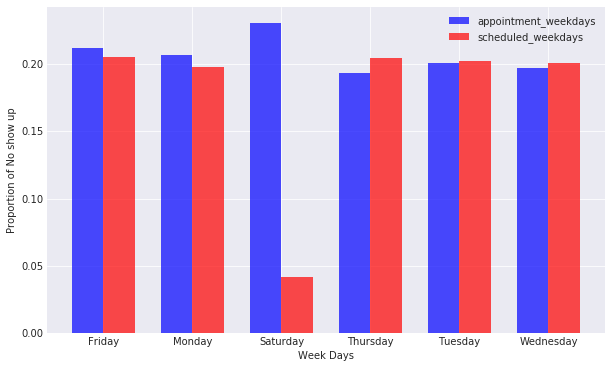

In [54]:
# Seeing the results of effect to whether showing up or not

plt.subplots(figsize=(10,6))
blue_bars=plt.bar(ind,values_appo,width,color='b', alpha=.7,label='appointment_weekdays')
red_bars=plt.bar(ind+width,values_shec,width,color='r', alpha=.7,label='scheduled_weekdays')
locations=ind+width/2
labels=df.groupby('scheduled_weekdays')['no_show'].mean().index
plt.xticks(locations,labels)
plt.xlabel('Week Days')
plt.ylabel('Proportion of No show up')
plt.legend(loc='upper right');

> **Explanation**: In this graph we can see that the no-showing up possibilities of scheduled days and appointment days. When I check the results, although the number of Saturdays is small, I can see an interesting proportion there. The people who scheduled an appointment on Saturday, generally showed up their appointment. But, if the people's apponitment day was Saturday, they didn't show up their appointment. However, as I said before, the number of Saturday data is too small to evaluate. So, It is not sensible to say direct assesment. The other days seems the same in terms of both appointment day and scheduled day. 


### Question 5) Did people who makes more appointment than the others make habit that don't show up for their appointments? What can we say for these people about gender and membership of walfare program (scholarship)?

In [55]:
# Checking number of unique patient

df.patientid.count() , df.patientid.nunique()

(110526, 62298)

> **Explanation**: As we can see, we have 110527 rows but 62299 unique patient. That means some patients made more than one appointment.


In [56]:
# Checking the top most 5 patients who make too many appointment

df.patientid.value_counts().head(5) 

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
Name: patientid, dtype: int64

> **Explanation**: I checked the top 5 people who makes more appointment. Some of the people made more than 80 appointment, so on and so fort.

In [57]:
# Cheking people who makes more than 20 appointment in our data 

df.patientid.value_counts().values>20

array([ True,  True,  True, ..., False, False, False], dtype=bool)

> **Explanation**: df.patientid.value_counts() is a series. So, values method brings an array. Since I checked the more than 20 appointment, the result came as an array consist of True an False

In [58]:
# Checking the number of patients who makes more than 20 appointment

n_of_patients=(df.patientid.value_counts().values>20).sum()
n_of_patients

35

In [59]:
# Keeping the patients id in a variable

ptients_id=df.patientid.value_counts().head(n_of_patients).index
ptients_id

Int64Index([822145925426128,     99637671331,  26886125921145,  33534783483176,
               258424392677,  75797461494159, 871374938638855,   6264198675331,
             66844879846766,    872278549442,  89239687393655,      8435223536,
            853439686798559,  14479974122994,  65433599726992,  81894521843749,
              9452745294842, 188232341789524,   2271579924275,   9496196639835,
             13364929297498,   1484143378533,  88834999836575, 986162815579582,
            712458866975343, 416755661551767,   6128878448536,  81213966782532,
              8634164126317,   1198157171975,  36994987339512,  37994336685892,
               496777386375,  17798942295934,    725983755516],
           dtype='int64')

> **Explanation**: I keeped the patients id in an array in order to find these patients in our dataset

In [60]:
# Using isin method to select these patient ids in data set

filt=df.patientid.isin(ptients_id)
df[filt].shape

(1531, 16)

> **Explanation**: 'isin' method brings a mask to select these patients in our all dataset

In [61]:
# Making repetitive function for plot

def func_plot_3(df, grpby_feature, feature, ttle, x, y):
    
    df.groupby(grpby_feature)[feature].mean().sort_values(ascending=False).plot(kind='bar',figsize=(8,4))
    plt.title(ttle)
    plt.xlabel(x)
    plt.ylabel(y)

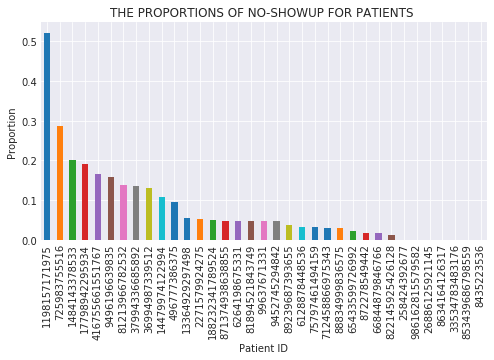

In [62]:
# Drawing the graph to see which patients made habits to don't show up for their appointments 

ttle= 'THE PROPORTIONS OF NO-SHOWUP FOR PATIENTS '
func_plot_3(df[filt], 'patientid', 'no_show', ttle, 'Patient ID', 'Proportion');



> **Explanation**: According to result, the patient who has the patient id 1198157171975 is the most proportion in order to don't show up his/her appointment. We can check also these patient's gender and walfare membership program (sholarship).

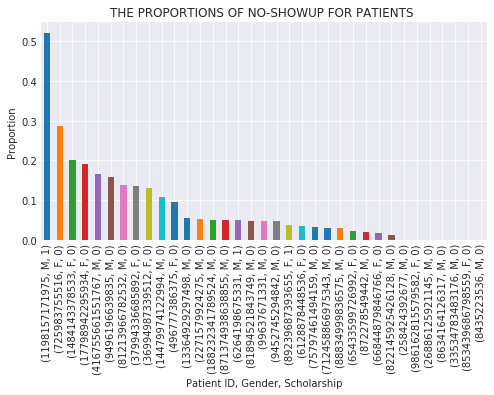

In [63]:
# Checking the gender and walfare program membership in previous graph

grp=['patientid','gender','scholarship']
func_plot_3(df[filt], grp, 'no_show', ttle, 'Patient ID, Gender, Scholarship', 'Proportion');


> **Explanation**: As we can see in the result, the patient who has the patient id 1198157171975 is a male and a membership of walfare program. There is only 3 person are member ship of walfare program and no distinguish in terms of gender.

<a id='conclusions'></a>
## Conclusions

> This dataset which collects information from medical appointments in Brazil was a very exciting data set for me. I started firstly a literature review to understand data better. My main focus was to understand and to describe data well. After I understood the dataset, I asked myself that what do I wonder in this dataset and I produced the research questions. 
I tried to follow a sensible way to reach the results. My conclusions are below:<br>
<br>
>> 1) The proportion of male and female patients who don't show up for their appointment are almost the same. So gender is not a distingusing feature in terms of no show up. When we make our queston more complex by adding SMS_received and above average age, the result didn't chage. However, when I check the age mean in terms of no show up data, I recognized that an effect to result. So I decided to evaluate this issue in other question. Research Question 3 was created because of that.<br>
<br>
>> 2) When I look at hipertension, diabetes and handcap features seperately, in each option, I recognized that no show up appointment proportion is directly proportional possibility of having these disease. When I examine the graph, I see that patients with at least one disease (hipertension, diabets and disability) are less proportion to no show up for their appointments. The result is so reasonable for me. If you have a cronical disease or disabilities, you may need to go to hospital more.<br>
<br>
>> 3) In Research Question 1, I recognized an important thing that the age can effects our no show up results. So, I produced 'age_groups' column by using age column. And this column has 4 different group. Child, Young, Maturity and Old. Proportion of hipertension and diabets are increase with age. But the patients who use more alchol are between 37 and 55 years old. When it comes to no show up, young people who are between 18 and 37 years old don't show up for their appointments more than the other age groups.<br>
<br>
>> 4) By using scheduledday and appointmentday columns, 2 new columns were produced to see the day of scheduled and appointment. The main idea is to understand the effect of day to no show up. The people who scheduled an appointment on Saturday, generally showed up their appointment. But, if the people's apponitment day was Saturday, they didn't show up their appointment. However,the number of Saturday data is too small to evaluate. So, It is not sensible to say direct assesment. The other days seems the same in terms of both appointment day and scheduled day. <br>
<br>
>> 5) According to result, the patient who has the patient id 1198157171975 is the most proportion in order to don't show up his appointment. There is only 3 person are member ship of walfare program and no distinguish in terms of gender.<br>

> I approached this dataset in many perpective but I also could evaluate in terms of neighbourhood as well. Additionally, I didn't make any anomaly detection (I only controlled negative age) or outliar analysis. I could make a better litrature review. I didn't check the correlation between the numerical data since this topic is out of scope for now. <br>

## Limitations
> In this study, Female patients were almost twice the males patients. This was a limitaion for me. 
Also, no-showup proportion was only %20 in all dataset. Another limitation was the number of Saturdays for both scheduled and appointment day. It is difficult to find reliable result for this day to my research question.


In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0